<table align="center" width=100%>
    <tr>
        <td width="15%">
            <img src="homework.png">
        </td>
        <td>
            <div align="center">
                <font color="#21618C" size=8px>
                    <b> Take-Home <br>(Day 2)
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

#### Import the required libraries

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings
filterwarnings('ignore')
pd.options.display.max_columns = None
pd.options.display.max_rows = None
pd.options.display.float_format = '{:.6f}'.format
from sklearn.model_selection import train_test_split
import statsmodels
import statsmodels.api as sm
import statsmodels.stats.api as sms
from statsmodels.graphics.gofplots import qqplot
from scipy import stats
from sklearn.metrics import mean_squared_error
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

#### Read the data

Load the csv file and print the first five observations.

In [2]:
# type your code here
df = pd.read_csv('diamond_data.csv')
df.head(2)

,carat,cut,color,depth,table,price,x,y,z
0,0.300000,Good,F,61.100000,61.000000,682,4.290000,4.320000,2.630000
1,0.720000,Ideal,H,62.000000,56.000000,2443,5.800000,5.740000,3.580000


Our objective is to predict the price of the diamond.

**The data definition is as follows:** <br>

**carat**: Weight of the diamond

**cut**: Quality of the cut (Fair, Good, Very Good, Premium, Ideal)

**color**: Diamond color

**depth**: Total depth percentage (it is calculated as: 2 * z / (x + y))

**table**: Width of top of the diamond relative to the widest point 

**price**: Price of a diamond in US dollars (target/dependent variable)

**x**: Length of a diamond in mm

**y**: Width of a diamond in mm

**z**: Depth of a diamond in mm

### Let's begin with some hands-on practice exercises

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>1. Is the variable representing the width of a diamond skewed? If yes, apply an appropriate technique to make the distribution less skewed </b>
                </font>
            </div>
        </td>
    </tr>
</table>

0.4383878452014628


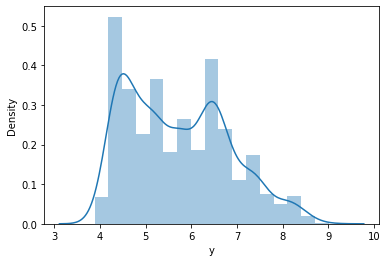

In [3]:
# type your code here
print(df.y.skew())
sns.distplot(df.y)
plt.show()

0.15322643692701352


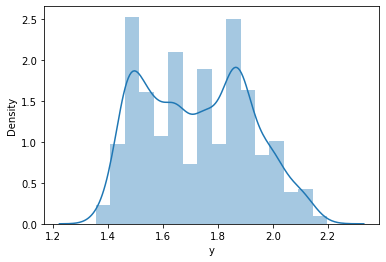

In [4]:
df['y']=np.log(df['y'])
print(df.y.skew())
sns.distplot(df.y)
plt.show()

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>2. Build a full model and check whether the errors have a serial correlation or not</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [5]:
# type your code here
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1547 entries, 0 to 1546
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   carat   1547 non-null   float64
 1   cut     1547 non-null   object 
 2   color   1547 non-null   object 
 3   depth   1547 non-null   float64
 4   table   1547 non-null   float64
 5   price   1547 non-null   int64  
 6   x       1547 non-null   float64
 7   y       1547 non-null   float64
 8   z       1547 non-null   float64
dtypes: float64(6), int64(1), object(2)
memory usage: 108.9+ KB


In [6]:
df['color']=pd.get_dummies(df['color'], drop_first=True)
df['cut']=pd.get_dummies(df['cut'], drop_first=True)

In [7]:
x = df.drop('price',axis = 1)
y = df['price']
x = sm.add_constant(x)
model = sm.OLS(y,x).fit()
print(model.summary())
# since durbin watson value is 1.958 <2 hence the model has positive autocorrelation

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.876
Model:                            OLS   Adj. R-squared:                  0.875
Method:                 Least Squares   F-statistic:                     1359.
Date:                Fri, 26 Nov 2021   Prob (F-statistic):               0.00
Time:                        16:23:06   Log-Likelihood:                -13455.
No. Observations:                1547   AIC:                         2.693e+04
Df Residuals:                    1538   BIC:                         2.698e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.791e+04   9854.677      2.832      0.0

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>3. Add the features one-by-one to obtain the set of features which explains the price of a diamond with the highest accuracy
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [8]:
# type your code here
x = df.drop('price',axis = 1)
y = df['price']
lr = LinearRegression()
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
sfs_fwd = sfs(estimator = lr,k_features = 'best',scoring = 'r2',forward = True,verbose = 2)
fwd = sfs_fwd.fit(x,y)
fwd.k_feature_names_

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s finished

[2021-11-26 16:25:13] Features: 1/8 -- score: 0.8611859711618426[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s finished

[2021-11-26 16:25:13] Features: 2/8 -- score: 0.8701992571397323[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s finished

[2021-11-26 16:25:13] Features: 3/8 -- score: 0.8725142205652803[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 

('carat', 'cut', 'color', 'table', 'z')

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>4. Use the 4-fold cross validation method and compute the coefficient of determination for each model
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [1]:
# type your code here 


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>5. Identify the most insignificant numerical variable among all the numeric variables in the data
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [9]:
# type your code here
x = df.drop('price',axis = 1)
y = df['price']
x = sm.add_constant(x)
model = sm.OLS(y,x).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.876
Model:                            OLS   Adj. R-squared:                  0.875
Method:                 Least Squares   F-statistic:                     1359.
Date:                Fri, 26 Nov 2021   Prob (F-statistic):               0.00
Time:                        17:19:54   Log-Likelihood:                -13455.
No. Observations:                1547   AIC:                         2.693e+04
Df Residuals:                    1538   BIC:                         2.698e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.791e+04   9854.677      2.832      0.0

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>6. Do the residuals obtained from the full model follow a normal distribution?
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [11]:
# type your code here
stats.shapiro(model.resid)
# data is not normally distributed. Because of pvalue is less than 0.05.

ShapiroResult(statistic=0.8228507041931152, pvalue=2.7765055920229846e-38)

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>7. Is it possible to make the residuals normal? If yes, do the needful
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [14]:
x = (df.drop('price',axis = 1))
y = np.log(df['price'])
x = sm.add_constant(x)
model = sm.OLS(y,x).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.943
Model:                            OLS   Adj. R-squared:                  0.942
Method:                 Least Squares   F-statistic:                     3152.
Date:                Fri, 26 Nov 2021   Prob (F-statistic):               0.00
Time:                        17:24:11   Log-Likelihood:                -27.809
No. Observations:                1547   AIC:                             73.62
Df Residuals:                    1538   BIC:                             121.7
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.9515      1.675      1.165      0.2

In [15]:
stats.shapiro(model.resid)

ShapiroResult(statistic=0.994342565536499, pvalue=1.2954297744727228e-05)

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>8. Consider the full model and remove the variables one-by-one to obtain the set of seven most significant variables
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [16]:
# type your code here
x = df.drop('price',axis = 1)
y = df['price']
lr = LinearRegression()
sfs_bwd = sfs(estimator = lr,k_features = 7,scoring = 'r2',forward = False,verbose = 2)
bwd = sfs_bwd.fit(x,y)
bwd.k_feature_names_

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s finished

[2021-11-26 17:24:59] Features: 7/7 -- score: 0.8726584804752623

('carat', 'cut', 'color', 'depth', 'table', 'x', 'y')

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>9. Identify the colors of a diamond that are not significant while predicting the price?
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>10. Build a regression model on the five features obtained by eliminating the features recursively 
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [19]:
# type your code here
y=df['price']
x=df.drop('price', axis=1)
x=sm.add_constant(x)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 10)
linreg_rfe = LinearRegression()
rfe_model = RFE(estimator=linreg_rfe, n_features_to_select = 5)
rfe_model = rfe_model.fit(X_train, y_train)
feat_index = pd.Series(data = rfe_model.ranking_, index = X_train.columns)
signi_feat_rfe = feat_index[feat_index==1].index
print(signi_feat_rfe)

Index(['carat', 'cut', 'x', 'y', 'z'], dtype='object')


In [21]:
new_X_train = X_train[['carat', 'cut', 'x', 'y', 'z']]
linreg = LinearRegression()
linreg.fit(new_X_train, y_train)
linreg.score(new_X_train, y_train)

0.8755790055941407